<a href="https://colab.research.google.com/github/saiyaswanth883/DL_Lab/blob/main/DL_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptron**

In [ ]:
# prompt: python code for perceptron in ml

import numpy as np

class Perceptron:
  def __init__(self, learning_rate=0.01, n_iters=1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.activation_func = self._unit_step_func
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    # init parameters
    self.weights = np.zeros(n_features)
    self.bias = 0

    y_ = np.array([1 if i > 0 else 0 for i in y])

    for _ in range(self.n_iters):
      for i, x_i in enumerate(X):
        linear_output = np.dot(x_i, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)

        # Update weights and bias
        update = self.lr * (y_[i] - y_predicted)
        self.weights += update * x_i
        self.bias += update

  def predict(self, X):
    linear_output = np.dot(X, self.weights) + self.bias
    y_predicted = self.activation_func(linear_output)
    return y_predicted

  def _unit_step_func(self, x):
    return np.where(x >= 0, 1, 0)


# **Implementation of Auto Encoders**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

**Loading the Data Set**

In [ ]:
(x_train,_), (x_test,_)=fashion_mnist.load_data()
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0238 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0116 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0087 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.008

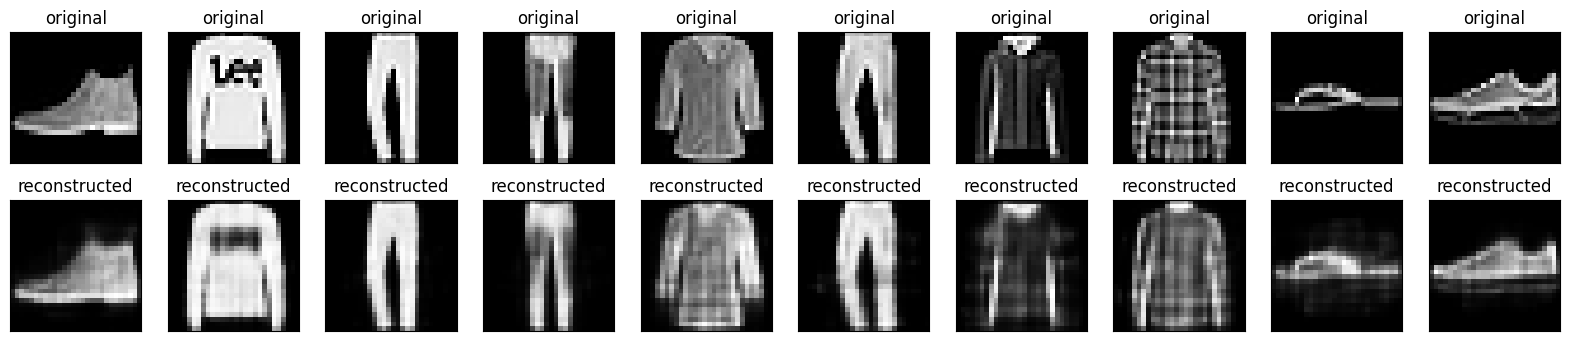

In [22]:
latent_dim=64

class Autoencoder(Model):
  def __init__(self, encoding_dim):
    super(Autoencoder,self).__init__()
    self.latent_dim=latent_dim
    self.encoder=tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder=tf.keras.Sequential([
        layers.Dense(784, activation='sigmoid'),
        layers.Reshape((28,28))
    ])
  def call(self,x):
    encoded =self.encoder(x)
    decoded =self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1 )
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n )
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

#**Image Denoising**

(60000, 28, 28, 1)


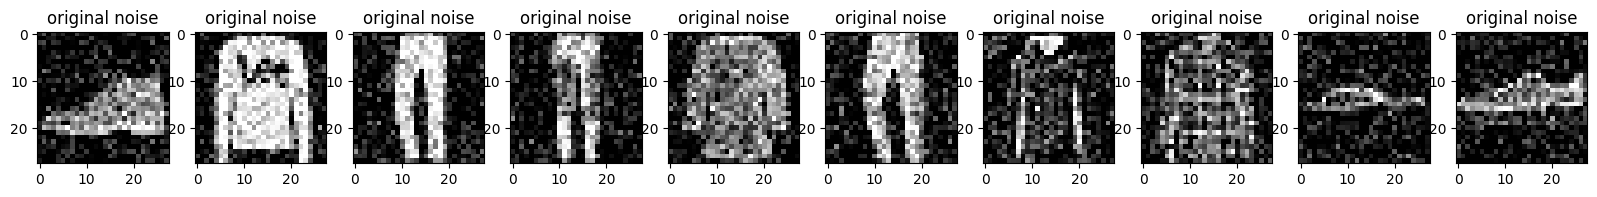

In [34]:
(x_train,_), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
print(x_train.shape)

# Adding random noise to the images.
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)


#Plot the noisy images.
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.title("original noise")
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()
plt.show()

# **Convolutional Autoencoder**

In [49]:
class Denoise(Model):
  def __int__(self):
    super (Denoise, self). init()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
  def call(self, x):
    encoded=self.encoder(x)
    decoded=self.decoder (encoded)
    return decoded
autoencoder=Denoise()